<a href="https://colab.research.google.com/github/NeroMipt/ML_MIPT/blob/main/hometask/task1-1/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=2, replace=False).tolist()


task

Enter your mail: bokshanskii.ev@phystech.edu


{'mail': 'bokshanskii.ev@phystech.edu',
 'id': 2716284521,
 'type': np.str_('classification'),
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['Перцептрон', 'Логистическая регрессия']}

In [17]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [18]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [19]:
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Создание DataFrame для удобства
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

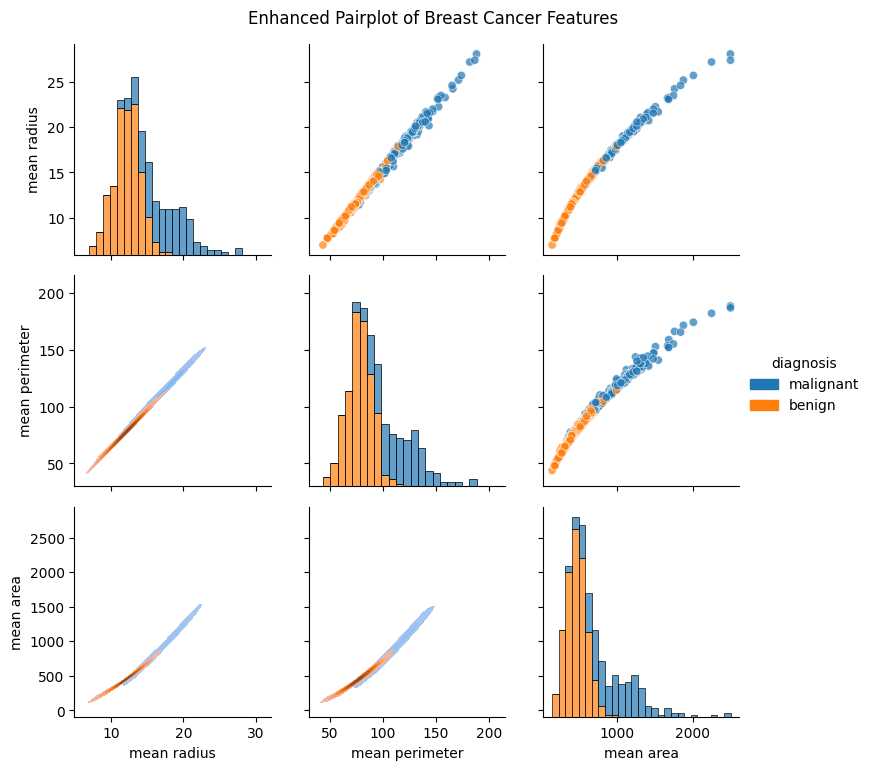

In [20]:
selected_features = ['mean radius', 'mean perimeter', 'mean area']

# Более компактный pairplot с настройками
g = sns.PairGrid(df[selected_features + ['diagnosis']], hue='diagnosis', palette='tab10')
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, alpha=0.7, multiple='stack')
g.add_legend()
plt.suptitle('Enhanced Pairplot of Breast Cancer Features', y=1.02)
plt.show()